# Predições e Previsões para Model Fitness

Segue aqui um projeto de Análise de dados, de bancos de dados em CSV contendo informações sobre rotatividade em um determinado mês e informações sobre o mês anterior em determinada academia. 

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib
- Sklearn para modelos de Machine Learning e métricas estatísticas.
- Numpy para lidar com os dados nulos

In [1]:
import pandas as pd
import matplotlib as plot
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


# DataFrame

## Importando Dataframes

### Descrição dos dados:

- Churn: A rotatividade do mês em questão.


#### Dados do mês anterior:
- Gender: Gênero do cliente.


- Near Location: Se o cliente morar ou trabalhar na vizinhança onde a academia está localizada.


- Partner: Se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários).


- Promo_friends: Se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação).


- Phone: Se o usuário fornece o seu número de telefone.


- Age: Idade.


- Lifetime: O tempo (em meses) desde a primeira vez que o cliente veio à academia.


#### Dados do log de frequência e compras e dados sobre status de filiação atual:

- Contract_period: 1 mês, 3 meses, 6 meses, ou um ano de contrato com a academia.


- Month_to_end_contract: Os meses remanescentes até que o contrato expira.


- Group_visits: Se o cliente participa de sessões em grupo.


- Avg_class_frequency_total: Frequência média de idas por semana por toda a vida do cliente.


- Avg_class_frequency_current_month: Média de frequência de idas por semana no mês anterior.


- Avg_additional_charges_total: A quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.

In [2]:
df=pd.read_csv('/datasets/gym_churn_us.csv')

## Observando dados gerais do dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [7]:
df.columns=df.columns.str.lower()

Dando uma olhada geral nos dados é possível observar que não há valores nulos, e as variáveis booleanas para o modelo de regressão logística que vamos utilizar mais para frente no notebook estão em valores inteiros, o que é válido para utilizar!

## Análise exploratória dos dados (AED)

In [8]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

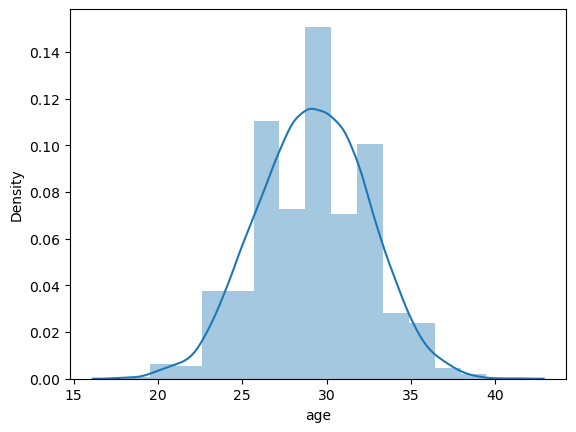

In [9]:
sns.distplot(df['age'], bins=15)

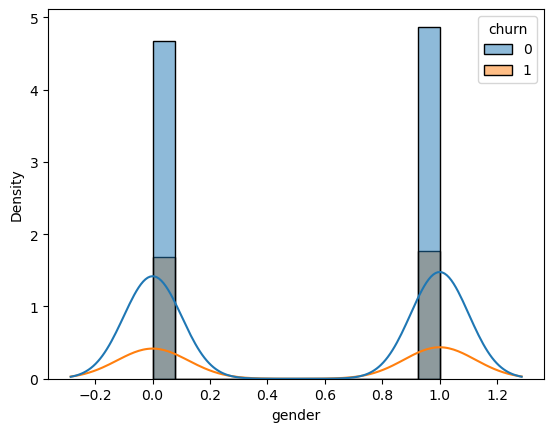

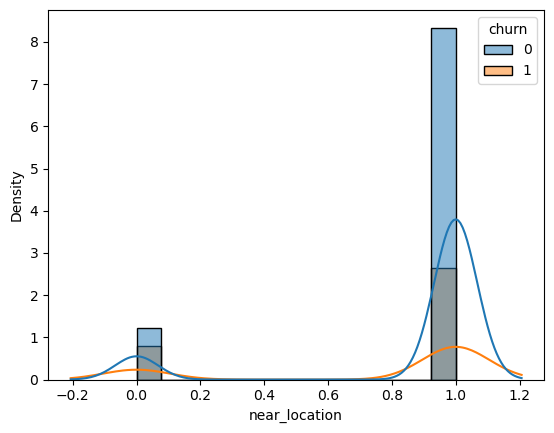

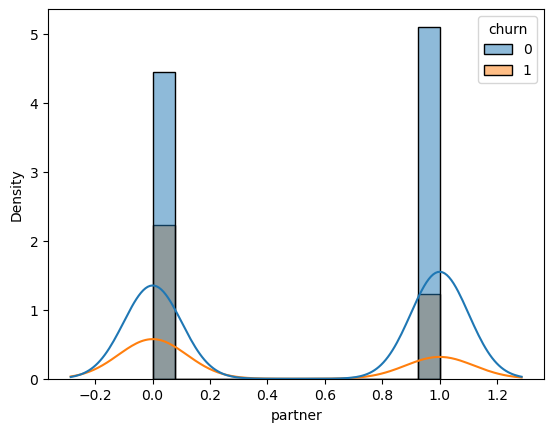

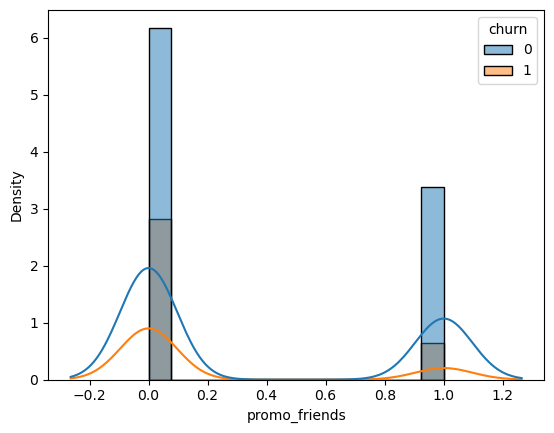

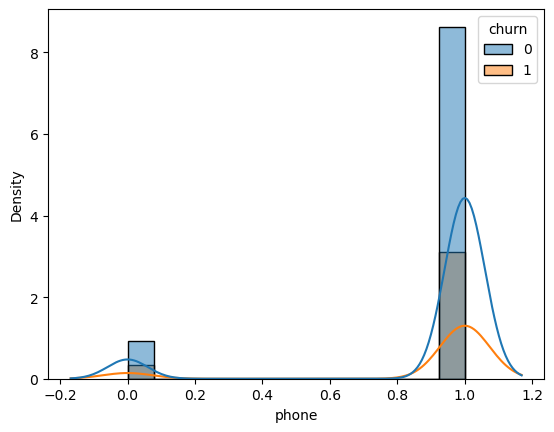

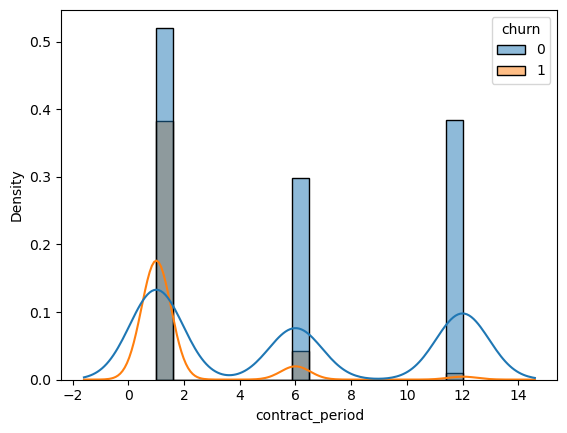

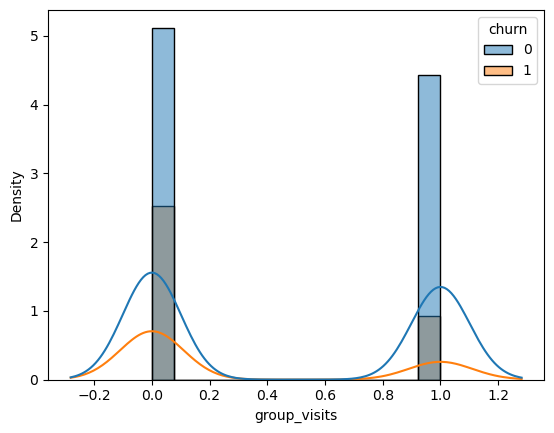

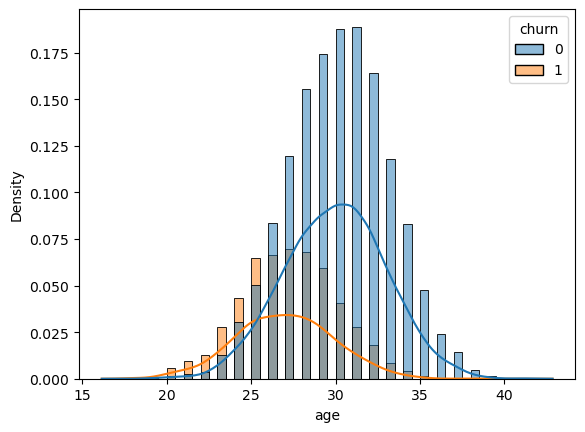

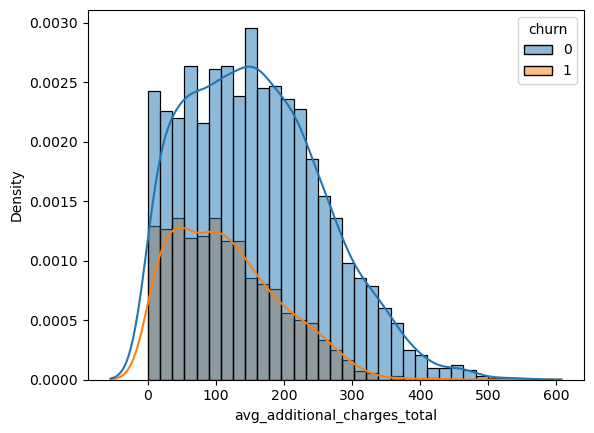

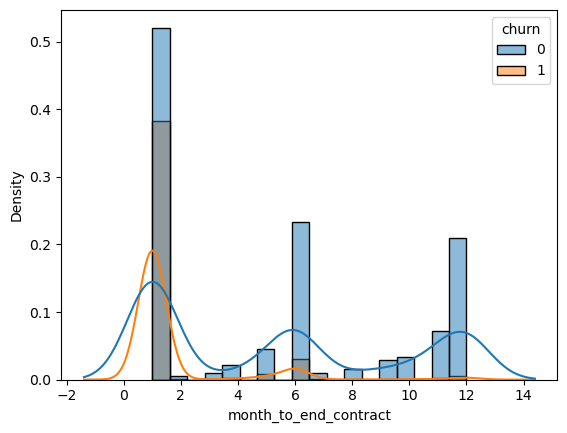

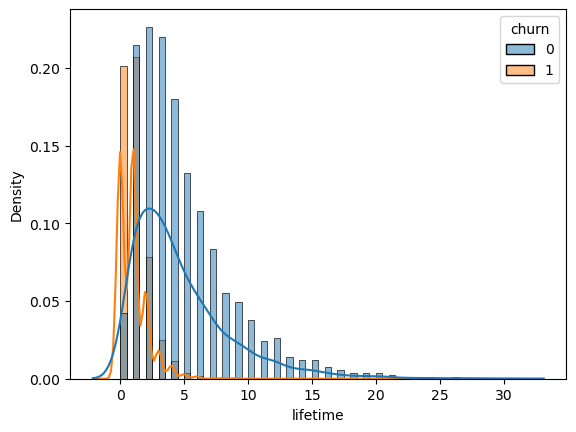

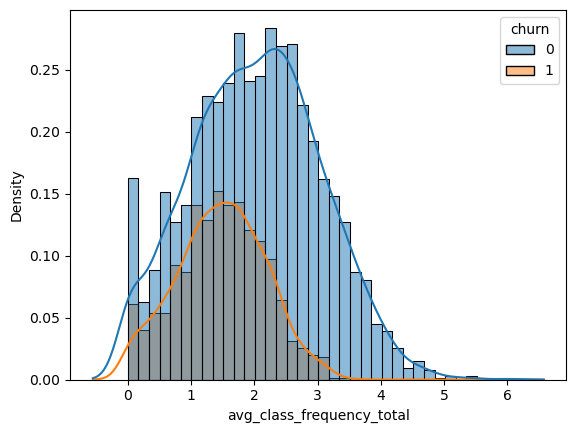

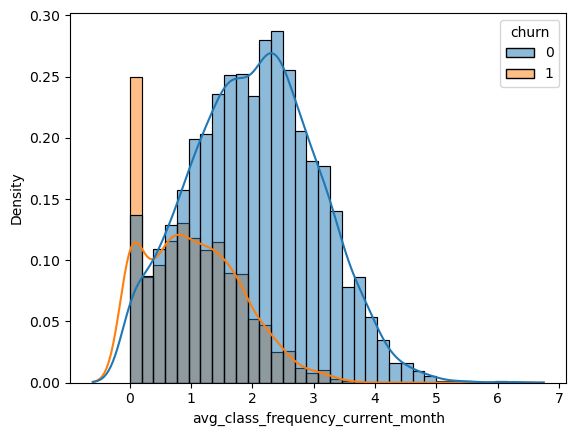

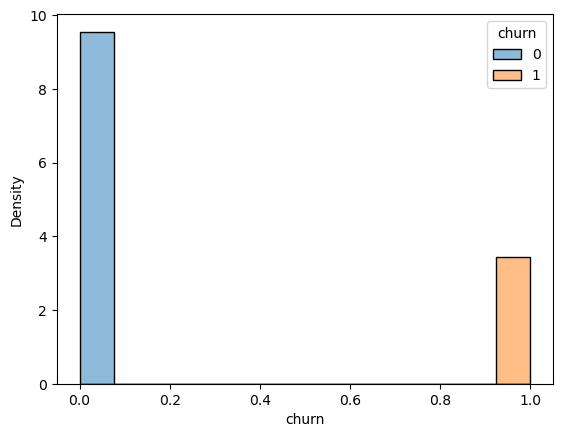

In [10]:
for i in df.columns:
    sns.histplot(data=df, x=i, hue='churn', kde=True, stat='density', kde_kws=dict(cut=3))
    plt.show()

## Entendendo rotatividade pela EAD:

O perfil de quem tende a ficar, é composto por usuários que se localizam próximo a academia, estão em alguma empresa filiada, utilizaram a promoção do código de algum amigo na academia (provavelmente possuem parceiro de treino), possuem um longo período de contrato, participa de aulas em grupo, está com menos de 40 e mais de 25 anos, resta mais de 1 mês para encerrar o contrato, estão a mais de 3 meses na academia, possuem uma frequência de ida de 3 vezes por semana na academia.

<AxesSubplot:>

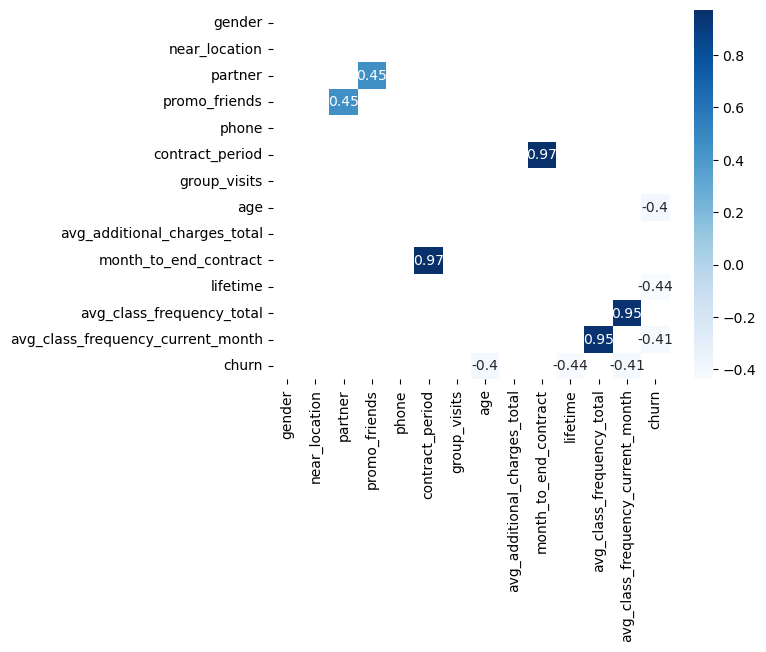

In [11]:
# Definindo matrix de correlação
# Calcular a matriz de correlação
corr_matrix = df.corr()

# Filtrando o dataframe original com base no critério de correlação
# Filtra as correlações maiores que 0.4 e menores que 1
mask = (df.corr() > 0.4) & (df.corr() < 1)

# Filtra as correlações menores que -1 e maiores que -1
mask2 = (df.corr() > -1) & (df.corr() < -0.4)

# Cria o heatmap com as duas máscaras aplicadas
sns.heatmap(df.corr()[mask | mask2], cmap="Blues", annot=True)

## Estudando correlações

### Tópicos a serem destacados:

- Relação forte entre promoção de amigos e parceria com uma empresa filiada a academia, talvez a firma forneça um código do tipo ou eles combinam a promoção da firma e o código de parceiro do colega de trabalho.

- A relação entre o mês para acabar o contrato e o período do contrato é clara.

- A relação negativa de idade e o não retorno a academia, mostra que pessoas jovens tendem a parmanecer mais tempo em contrato.


# Agrupando Clientes

In [12]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [13]:
# divida os dados sobre treinos e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Padronizando os dados
Padronizando os dados usando o método StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 


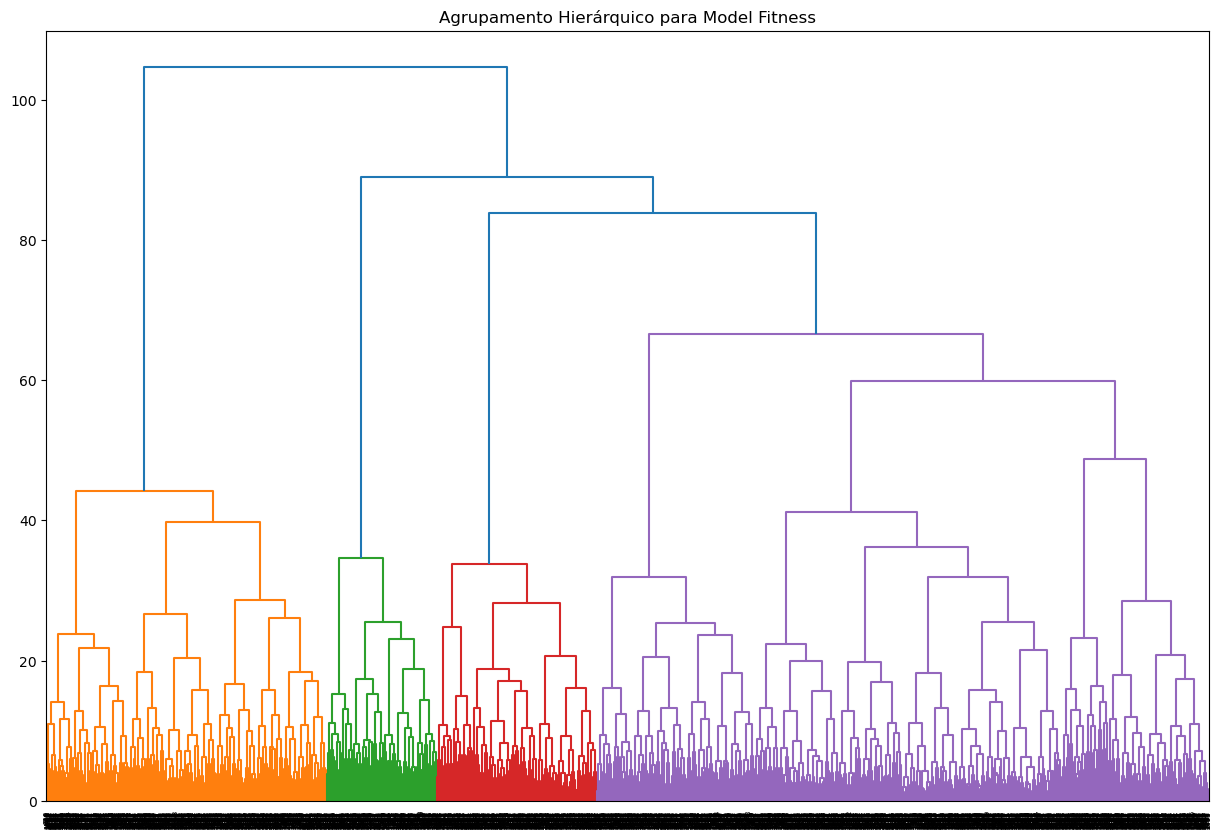

In [16]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico para Model Fitness')
plt.show() 

In [17]:
km = KMeans(n_clusters = 5)

In [18]:
# Predição os agrupamentos para observações
labels = km.fit_predict(X_sc)

# armazene rótulos de agrupamento no campo do nosso conjunto de dados
df['agrupamento'] = labels

# calcule a pontuação de silhueta para o agrupamento
#print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels) ))

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df.groupby(['agrupamento']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
agrupamento,,,,,,,,,,,,,,
0,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
1,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916
2,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
3,0.484921,1.000000,0.350794,0.238095,1.000000,1.953968,0.341270,28.167460,131.516081,1.861905,2.431746,1.246646,1.011770,0.515079
4,0.559622,0.976387,0.360094,0.237308,0.998819,2.687131,0.469894,30.109799,161.594478,2.478158,4.890201,2.847678,2.846030,0.067296


## Entendendo os perfis:
### O grupo 0 tem as seguintes características marcantes:

- Gênero: equilíbrio de gênero (49,9% feminino)
- Proximidade do local: a maioria mora próximo à academia (96,1%)
- Parceiro: alta adesão a programas de parceria (78,4%)
- Promoção por amigos: alta adesão a promoções por amigos (57,6%)
- Uso do telefone: todos forneceram o número de telefone (100%)
- Período de contrato: longa duração média do contrato (10,9 meses)
- Visitas em grupo: taxa média de participação em visitas em grupo (53,9%)
- Idade: média de 30 anos
- Custo adicional médio total: alto custo adicional médio total (161,1)
- Tempo restante de contrato: alto tempo médio restante de contrato (9,9 meses)
- Tempo de associação: alto tempo médio de associação com a academia (4,7 anos)
- Frequência média de aulas: alta frequência média de aulas (2,0 vezes por semana)
- Frequência média de aulas no mês atual: alta frequência média de aulas no mês atual (2,0 vezes por semana)
- Churn (taxa de cancelamento): baixa taxa de cancelamento (2,7%)

### Grupo 1:

- Gênero: maioria feminina (56,5%)
- Proximidade do local: a maioria mora próximo à academia (97,8%)
- Parceiro: baixa adesão a programas de parceria (34,3%)
- Promoção por amigos: baixa adesão a promoções por amigos (22,1%)
- Uso do telefone: todos forneceram o número de telefone (100%)
- Período de contrato: curta duração média do contrato (2,6 meses)
- Visitas em grupo: baixa taxa média de participação em visitas em grupo (47,2%)
- Idade: média de 30,1 anos
- Custo adicional médio total: alto custo adicional médio total (161,4)
- Tempo restante de contrato: baixo tempo médio restante de contrato (2,4 meses)
- Tempo de associação: média de 2,8 anos de associação com a academia
- Frequência média de aulas: média frequência média de aulas (2,8 vezes por semana)
- Frequência média de aulas no mês atual: alta frequência média de aulas no mês atual (2,8 vezes por semana)
- Churn (taxa de cancelamento): taxa de cancelamento moderada (7,4%)

### Grupo 2:

- Gênero: maioria feminina (48,3%)
- Proximidade do local: todos moram muito próximos à academia (100%)
- Parceiro: baixa adesão a programas de parceria (35,6%)
- Promoção por amigos: baixa adesão a promoções por amigos (24,3%)
- Uso do telefone: todos forneceram o número de telefone (100%)
- Período de contrato: curta duração média do contrato (2,0 meses)
- Visitas em grupo: baixa taxa média de participação em visitas em grupo (34,0%)
- Idade: média de 28,1 anos
- Custo adicional médio total: baixo custo adicional médio total (130,8)
- Tempo restante de contrato: baixo tempo médio restante de contrato (1,9 meses)
- Tempo de associação: média de 2,4 meses de associação com a academia
- Frequência média de aulas: baixa frequência média de aulas (1,2 vezes por semana)
- Frequência média de aulas no mês atual: alta frequência média de aulas no mês atual (1,0 vezes por semana)
- Churn (taxa de cancelamento): alta taxa de cancelamento (52,0%)

### Grupo 3:

- Gênero: a maioria dos membros é feminina, com 52,33% do grupo sendo mulheres.
- Proximidade: a maioria dos membros mora perto da academia, com uma pontuação média de 0,86.
- Parceiro: a maioria dos membros não tem um parceiro, com uma pontuação média de 0,47.
- Promoção de amigos: a maioria dos membros não aderiu à promoção de trazer amigos, com uma pontuação média de 0,31.
- Telefone: a maioria dos membros não forneceu seu número de telefone, com uma pontuação média de 0,0.
- Período de contrato: a maioria dos membros possui um período médio de contrato de 4,47 meses.
- Visitas em grupo: a maioria dos membros não participa de visitas em grupo, com uma pontuação média de 0,43.
- Idade: a idade média dos membros é de 29,3 anos.
- Despesas adicionais médias totais: a média das despesas adicionais totais é de 144,21.
- Meses até o final do contrato: a maioria dos membros tem uma média de 4,47 meses restantes em seus contratos.
- Tempo de associação: a média do tempo de associação é de 3,94 meses.
- Frequência média de aulas total: a média da frequência média de aulas total é de 1,85 aulas por semana.
- Frequência média de aulas no último mês: a média da frequência média de aulas no último mês é de 1,72 aulas por semana.
- Churn: o churn rate desse grupo é de 0,27, ou seja, cerca de 27% dos membros cancelaram sua associação.

### Grupo 4: 

- Gênero: a maioria dos membros é feminina, com 49,7% do grupo sendo mulheres.
- Proximidade: nenhum dos membros mora perto da academia, com uma pontuação média de 0,0.
- Parceiro: a maioria dos membros tem um parceiro, com uma pontuação média de 0,46.
- Promoção de amigos: a maioria dos membros não aderiu à promoção de trazer amigos, com uma pontuação média de 0,08.
- Telefone: todos os membros forneceram seus números de telefone.
- Período de contrato: a maioria dos membros possui um período médio de contrato de 2,22 meses.
- Visitas em grupo: a maioria dos membros não participa de visitas em grupo, com uma pontuação média de 0,22.
- Idade: a idade média dos membros é de 28,48 anos.
- Despesas adicionais médias totais: a média das despesas adicionais totais é de 135,63.
- Meses até o final do contrato: a maioria dos membros tem uma média de 2,22 meses restantes em seus contratos.
- Tempo de associação: a média do tempo de associação é de 2,81 meses.

# Construa um modelo para predizer a rotatividade de clientes

## Regressão Linear

In [20]:
# definindo o algoritmo do modelo
model = LogisticRegression()

In [21]:
# treinando seu modelo
model.fit(X_train, y_train)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# use o modelo treinado para fazer previsões
predictions = model.predict(X_test) 
probabilities = model.predict_proba(X_test) 

In [23]:
print('Métricas da regressão linear')
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisão: {:.2f}'.format(precision_score(y_test, predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))


Métricas da regressão linear
Acurácia: 0.91
Precisão: 0.82
Sensibilidade: 0.80
F1: 0.81
ROC_AUC: 0.87


## Árvores de Decisão

In [24]:
# Definindo o algoritmo do novo modelo com base na árvore de decisão
tree_model = DecisionTreeClassifier(random_state=0)

# treine seu modelo
tree_model.fit(X_train, y_train)

# use o modelo treinado para fazer previsões
tree_predictions = tree_model.predict(X_test) 

tree_probabilities = tree_model.predict_proba(X_test)[:,1]

In [25]:
print('Métricas da árvore de decisão')
print('Acurácia: {:.2f}'.format(accuracy_score(y_test,tree_predictions)))
print('Precisão: {:.2f}'.format(precision_score(y_test,tree_predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_predictions)))

Métricas da árvore de decisão
Acurácia: 0.90
Precisão: 0.79
Sensibilidade: 0.80
F1: 0.80
ROC_AUC: 0.87


# Conclusão

# Como melhorar a retenção de clientes e reduzir o churn

### I. Introdução

Apresentação do problema: alto índice de churn na empresa

Objetivo do projeto: identificar padrões e fatores que contribuem para o churn e propor soluções

### II. Análise exploratória de dados

Descrição dos dados: características dos clientes e informações sobre churn

Análise de correlação: identificação de variáveis mais relevantes para o churn

Visualização de dados: gráficos e tabelas para entender melhor o comportamento dos clientes

### III. Modelagem preditiva

Preparação dos dados: limpeza, transformação e seleção de variáveis

Treinamento de modelos de regressão linear e árvore de decisão

Avaliação dos modelos: métricas de desempenho e escolha do melhor modelo

### IV. Conclusões e recomendações

Conclusões sobre os fatores que mais contribuem para o churn e as estratégias mais efetivas para reduzi-lo

Recomendações básicas para trabalhar com clientes:

- Melhorar a experiência do cliente: oferecer suporte de qualidade, personalização e facilidade de uso.

- Oferecer incentivos: promoções, descontos e programas de fidelidade.

- Realizar pesquisas de satisfação: entender as necessidades e expectativas dos clientes e ajustar o serviço.

- Monitorar e prever o churn: usar modelos de machine learning para detectar clientes em risco e tomar medidas preventivas.

### V. Conclusão

Recapitulação dos principais pontos do projeto.

Importância da análise de churn para empresas que buscam manter uma
base de clientes saudável e sustentável.